In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Wstęp: struktura dokumentu

Część 1. zawiera luźne przemyślenia i próby rozwiązania zadania. 

Część 2. zawiera definicję oraz przykłady użycia klasy rozwiązującej całe zadanie. Opiera się na istotnych modyfikacjach fragmentów z części 1. Moim zdaniem jednak klasę rozwiązującą problem można zrozumieć po jednorazowym solidnym przestudiowaniu Części 1.

Część 3. zawiera uwagi i przemyślenia na temat tego, co zostało do zrobienia aby móc uznać, że projekt został zakończony.

# Część 1.

In [53]:
a, b = 0.3, 0.7
alpha = 1

In [54]:
def w(s: int, a: float = 1, b: float = 1) -> int:
    if s not in [0, 1]:
        raise ValueError("Argument 's' musi mieć wartość 0 lub 1.")
    return (a if s == 1 else b)

0.7

In [55]:
A = np.zeros((16, 16))
for i in range(16):
    # "i" jest indeksem zmiennej w modelu
    # możemy ją zdekodować na "s1", "s2", "s3" i "s4"
    # używając zapisu binarnego
    bin_i = bin(i).lstrip('0b').zfill(4)
    s1, s2, s3, s4 = (int(i) for i in [*bin_i])
    # print(s1, s2, s3, s4)
    
    # teraz uzupełnimy macierz układu równań różniczkowych liniowych
    x = s1 + 2*s2 + 4*s3 + 8*s4 # indeks aktualnej zmiennej
    x_s1_bar = (1-s1) + 2*s2 + 4*s3 + 8*s4
    x_s2_bar = s1 + 2*(1-s2) + 4*s3 + 8*s4
    x_s3_bar = s1 + 2*s2 + 4*(1-s3) + 8*s4
    x_s4_bar = s1 + 2*s2 + 4*s3 + 8*(1-s4)
    
    A[x, x_s1_bar] = w(s1)*(1+alpha*(s2))
    A[x, x_s2_bar] = w(s2)*(1+alpha*(s1+s3))
    A[x, x_s3_bar] = w(s3)*(1+alpha*(s2+s4))
    A[x, x_s4_bar] = w(s4)*(1+alpha*(s3))
    A[x, x] = -(w(1-s1)*(1+alpha*(s2)) + w(1-s2)*(1+alpha*(s1+s3)) + w(1-s3)*(1+alpha*(s2+s4)) + w(1-s4)*(1+alpha*(s3)))

In [56]:
A

array([[ -4.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  1.,  -5.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.],
       [  1.,   0.,  -6.,   2.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.],
       [  0.,   2.,   2.,  -7.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.],
       [  1.,   0.,   0.,   0.,  -6.,   1.,   2.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.],
       [  0.,   1.,   0.,   0.,   1.,  -7.,   0.,   3.,   0.,   0.,   0.,
          0.,   0.,   2.,   0.,   0.],
       [  0.,   0.,   2.,   0.,   2.,   0.,  -8.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.,   0.],
       [  0.,   0.,   0.,   2.,   0.,   3.,   2.,  -9.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.],
       [  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  -5.,   1.,   1.,
          0.,   2.,   

Rozwiązanie:

In [64]:
np.ones(16)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
def f(t: float, x: np.array) -> np.array:
    return A @ x

In [117]:
# Runge-Kutta hyperparameters
niter = 1000
h = 0.005

# Initial conditions
t0 = 0
x0 = np.random.rand(16)

# Runge-Kutta loop
t = np.zeros(niter)
x = np.zeros((niter, 16))

t[0] = t0
x[0, :] = x0
for i in range(niter):
    k1 = h*f(t[i], x[i, :])
    k2 = h*f(t[i] + h/2, x[i, :] + k1/2)
    k3 = h*f(t[i] + h/2, x[i, :] + k2/2)
    k4 = h*f(t[i] + h, x[i, :] + k3)
    
    if i == niter - 1:
        break
    
    t[i+1] = t[i] + h
    x[i+1, :] = x[i, :] + (k1 + 2*k2 + 2*k3 + k4)/6

Wyniki:

In [118]:
t

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,

In [119]:
x.shape

(1000, 16)

Wykresy:

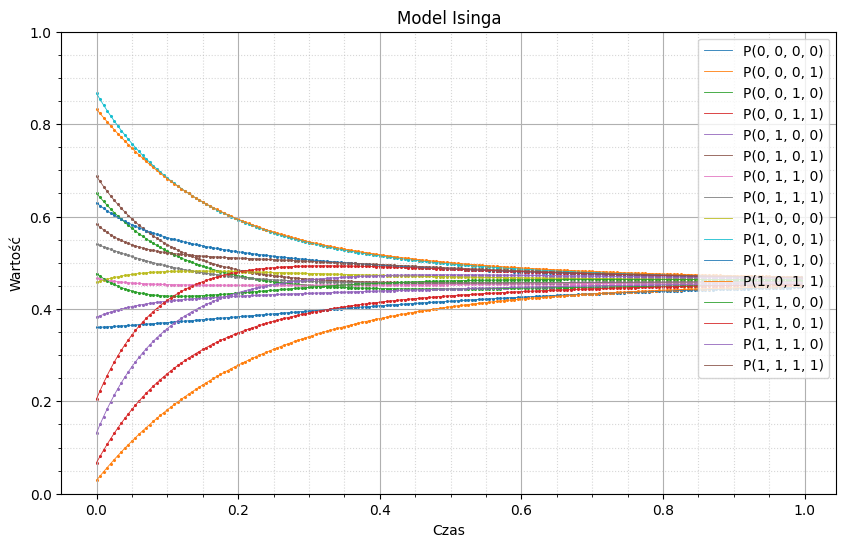

In [143]:
max_t = t0 + 1

fig, ax = plt.subplots(figsize=(10, 6))
for i in range(16):
    
    bin_i = bin(i).lstrip('0b').zfill(4)
    s1, s2, s3, s4 = (int(i) for i in [*bin_i])
    
    ax.plot(t[t <= max_t],
            x[t <= max_t, i],
            lw=0.6,
            label=f"P({s1}, {s2}, {s3}, {s4})")
    
    ax.scatter(t[t <= max_t],
               x[t <= max_t, i],
               s=1.5)
    
ax.grid(which="major", visible=True)
ax.grid(which="minor", alpha=0.5, linestyle=":")
ax.minorticks_on()

ax.legend(loc="upper right")
ax.set_title("Model Isinga")
ax.set_xlabel("Czas")
ax.set_ylabel("Wartość")
ax.set_ylim(bottom=0, top=1)
plt.show()

# Część 2.

Teraz zautomatyzujmy cały proces. Chunk poniżej zawiera klasę zdefiniowaną na potrzeby analizy - można o niej na razie myśleć jak o czarnej skrzynce xd

In [39]:
class PSB_project:
    
    def __init__(self, N: int = 4) -> None:
        # do zastanowienia: uogólnienie na dowolną liczbę N obiektów.
        self.N = N
        
        # macierz układu równań różniczkowych
        self.A = None
        
        # hiperparametry modelu
        self.a = None
        self.b = None
        self.alpha = None
        
        # warunki początkowe
        self.t0 = None
        self.x0 = None
        
        # hiperparametry metody Rungego-Kutty
        self.n_iter = None
        self.h = None
        
        # wskaźniki czy podano warunki początkowe oraz hiperparametry
        self.given_ics = False
        self.given_params = False
    
    def set_params(self, a: np.float32, b: np.float32, alpha: np.float32) -> None:
        """Funkcja umożliwiająca przestawienie hiperparametrów modelu

        Args:
            a (np.float32): parametr "a" odpowiadający w_i(1|0)
            b (np.float32): parametr "b" odpowiadający w_i(0|1)
            alpha (np.float32): parametr "α" 
        """
        self.given_params = True
        self.a = a
        self.b = b
        self.alpha = alpha
        # print(f"Zmodyfikowano hiperparametry\n... Nowe wartości to a={self.a}, b={self.b}, alpha={self.alpha}.")
        
    def set_iconds(self, t0: np.float32, x0: np.array = None) -> None:
        """Funkcja umożliwiająca specyfikację warunków początkowych

        Args:
            t0 (np.float): czas początkowy
            x0 (np.array | None, optional): wektor w chwili t0. Jeśli = None, x0 jest losowany jednostajnie z [0, 1]. Wartość domyślna: None.
        """
        self.given_ics = True
        self.t0 = t0
        if x0 is None:
            x0 = np.random.rand(16)
        else:
            self.x0 = x0
            
    def f(self, t: np.float32, x: np.array) -> np.array:
        """Funkcja obliczająca pochodną wektora zmiennych w układzie równań dx/dt = Ax.

        Args:
            t (np.float32): czas
            x (np.array): wektor wartości w czasie

        Returns:
            np.array: wartość Ax, czyli pochodna: dx/dt
        """
        return self.A @ x

    def w(self, s: int) -> np.float32:
        """Funkcja pomocnicza służąca do obliczania elementów w macierzy A

        Args:
            s (int): 0 albo 1, oznacza stan elementu układu

        Raises:
            ValueError: gdy "s" nie jest równy 0 lub 1

        Returns:
            value (float): "a" albo "b", odpowiednie hiperparametry modelu
        """
        if s not in [0, 1]:
            raise ValueError("Argument 's' musi mieć wartość 0 lub 1.")
        return (self.a if s == 1 else self.b)
        
    def generate_A(self) -> None:
        """Funkcja generująca pełną macierz układu równań liniowych
        """
        A = np.zeros((16, 16))
        for i in range(16):
            # "i" jest indeksem zmiennej w modelu
            # możemy ją zdekodować na "s1", "s2", "s3" i "s4"
            # używając zapisu binarnego
            bin_i = bin(i).lstrip('0b').zfill(4)
            s1, s2, s3, s4 = (int(i) for i in [*bin_i])
            # print(s1, s2, s3, s4)
            
            # teraz uzupełnimy macierz układu równań różniczkowych liniowych
            # odzyskujemy indeksy wszystkich potrzebnych zmiennych
            x = s1 + 2*s2 + 4*s3 + 8*s4 # ...to jest zmienna, której równanie uzupełniamy
            x_s1_bar = (1-s1) + 2*s2 + 4*s3 + 8*s4 # ... a te cztery są w to równanie zaangażowane
            x_s2_bar = s1 + 2*(1-s2) + 4*s3 + 8*s4 # ...
            x_s3_bar = s1 + 2*s2 + 4*(1-s3) + 8*s4 # ...
            x_s4_bar = s1 + 2*s2 + 4*s3 + 8*(1-s4) # ...
            
            # wpisujemy odpowiednie wartości w odpowiednie pola
            A[x, x_s1_bar] = self.w(s1)*(1+self.alpha*(s2))
            A[x, x_s2_bar] = self.w(s2)*(1+self.alpha*(s1+s3))
            A[x, x_s3_bar] = self.w(s3)*(1+self.alpha*(s2+s4))
            A[x, x_s4_bar] = self.w(s4)*(1+self.alpha*(s3))
            A[x, x] = -(self.w(1-s1)*(1+self.alpha*(s2)) + 
                        self.w(1-s2)*(1+self.alpha*(s1+s3)) + 
                        self.w(1-s3)*(1+self.alpha*(s2+s4)) + 
                        self.w(1-s4)*(1+self.alpha*(s3)))
        
        self.A = A
        # print(f"Pomyślnie zmodyfikowano macierz układu równań.")
    
    def Runge_Kutta(self, n_iter: np.int16 = 1000, h: np.float32 = 0.01) -> tuple[np.array]:
        
        if self.given_ics == False:
            raise ValueError("Przed wywołaniem należy podać warunki początkowe do metody 'iconds'.")
        
        self.n_iter = n_iter
        self.h = h
        
        # Runge-Kutta loop
        t = np.zeros(self.n_iter)
        x = np.zeros((self.n_iter, 16))

        t[0] = self.t0
        x[0, :] = self.x0
        for i in range(self.n_iter):
            k1 = self.h*self.f(t[i], x[i, :])
            k2 = self.h*self.f(t[i] + self.h/2, x[i, :] + k1/2)
            k3 = self.h*self.f(t[i] + self.h/2, x[i, :] + k2/2)
            k4 = self.h*self.f(t[i] + self.h, x[i, :] + k3)
            
            if i == self.n_iter - 1:
                break
            
            t[i+1] = t[i] + self.h
            x[i+1, :] = x[i, :] + (k1 + 2*k2 + 2*k3 + k4)/6
            
            if np.abs(np.sum(x[i+1]) - 1) > 0.001:
                raise ValueError("Prawdopodobieństwa nie sumują się do 1. Należy zmniejszyć długość kroku metody R-K.")
        
        return t, x
        
            
    def plot_variables(self, t: np.array, x: np.array, horizon: np.float32 = 1., save: bool = False) -> plt.Figure:
        max_t = self.t0 + horizon

        fig, ax = plt.subplots(figsize=(10, 6))
        for i in range(16):
            
            bin_i = bin(i).lstrip('0b').zfill(4)
            s1, s2, s3, s4 = (int(i) for i in [*bin_i])
            
            ax.plot(t[t <= max_t],
                    x[t <= max_t, i],
                    lw=0.6,
                    label=f"P({s1}, {s2}, {s3}, {s4})")
            
            ax.scatter(t[t <= max_t],
                    x[t <= max_t, i],
                    s=1.5)
            
        ax.grid(which="major", visible=True)
        ax.grid(which="minor", alpha=0.5, linestyle=":")
        ax.minorticks_on()

        leg = ax.legend(loc="upper right", title="Zmienne")
        for line in leg.get_lines():
            line.set_linewidth(2.0)
            
        ax.set_title(f"$a=${self.a}, $b$={self.a}, $\\alpha$={self.alpha}")
        ax.set_xlabel("Czas")
        ax.set_ylabel("Wartość")
        ax.set_ylim(bottom=0, top=np.max(x)+0.05)

        fig.suptitle(f"Zmienne w modelu Isinga", fontsize="x-large", fontweight="semibold")
        if save: 
            plt.savefig(f"Plots_toTeX/VAR_alpha"+f"{self.alpha}_a"+f"{self.a}_b"+f"{self.b}.png")
        return fig
    
    def comparative_plot_variables(self,
                         As: list[np.float32],
                         Bs: list[np.float32],
                         Alphas: list[np.float32],
                         horizon: np.float32 = 1.,
                         save: bool = False) -> plt.figure:
        max_t = self.t0 + horizon
        subplots_nb = len(As)*len(Bs)*len(Alphas)
        if subplots_nb == 1:
            self.set_params(As[0], Bs[0], Alphas[0])
            t, x = self.Runge_Kutta()
            self.plot_variables(t, x, save=save)
            return None
        
        # trzeba sprytnie ustawić grid i figsize - jak?
        if subplots_nb % 2 == 0:
            nrow = subplots_nb//2
            ncol = 2
            fig, AX = plt.subplots(nrow, ncol, figsize=(16, 6*nrow), layout="constrained")
        elif subplots_nb == 3:
            nrow = 3
            ncol = 1
            fig, AX = plt.subplots(nrow, ncol, figsize=(8, 6*nrow), layout="constrained")
        else:
            raise ValueError("Należy podać takie listy hiperparametrów 'As', 'Bs', 'Alphas', żeby iloczyn ich długości był liczbą parzystą lub był równy 3.")
          
        if nrow == 1 or ncol == 1:
            plot_nb = 0
        elif nrow > 1 and ncol > 1:
            plot_row = 0
            plot_col = 0
        else:
            raise ValueError("Niepoprawna siatka do 'plt.figure'.")

        
        for a in As:
            for b in Bs:
                for alpha in Alphas:
                    self.set_params(a, b, alpha)
                    self.generate_A()
                    t, x = self.Runge_Kutta()
                    
                    if nrow == 1 or ncol == 1:
                        ax = AX[plot_nb]
                    else:
                        ax = AX[plot_row, plot_col]
                        
                    for i in range(16):
            
                        bin_i = bin(i).lstrip('0b').zfill(4)
                        s1, s2, s3, s4 = (int(i) for i in [*bin_i])
                        
                        ax.plot(t[t <= max_t],
                                x[t <= max_t, i],
                                lw=0.6,
                                label=f"P({s1}, {s2}, {s3}, {s4})")
                        
                        ax.scatter(t[t <= max_t],
                                x[t <= max_t, i],
                                s=1.5)
                        
                    ax.grid(which="major", visible=True)
                    ax.grid(which="minor", alpha=0.5, linestyle=":")
                    ax.minorticks_on()

                    leg = ax.legend(loc="upper right", title="Zmienne")
                    for line in leg.get_lines():
                        line.set_linewidth(2.0)
                        
                    ax.set_title(f"$a=${self.a}, $b$={self.b}, $\\alpha$={self.alpha}")
                    ax.set_xlabel("Czas")
                    ax.set_ylabel("Wartość")
                    ax.set_ylim(bottom=0, top=np.max(x)+0.05)     
                    
                    if nrow == 1 or ncol == 1:
                        plot_nb += 1
                    else:
                        if plot_row + 1 < nrow:
                            plot_row += 1
                        else:
                            plot_row = 0
                            plot_col += 1
        fig.suptitle(f"Dynamika zmiennych w modelu Isinga", fontsize="xx-large", fontweight="semibold")
        if save: 
            plt.savefig(f"Plots_toTeX/comparativeVAR_alphafrom"+f"{Alphas[0]}to{Alphas[-1]}_afrom"+f"{As[0]}to{As[-1]}_bfrom"+f"{Bs[0]}to{Bs[-1]}.png")               
        return fig
    
    
    ######################################################################################
    # Poniżej: sekcja poświęcona badaniu średniej
    ######################################################################################
    
    def expected_value(self, x: np.array, which: int) -> tuple[np.array]:
        
        temp_list = []
        for i in range(16):
            bin_i = bin(i).lstrip('0b').zfill(4)
            s1, s2, s3, s4 = (int(i) for i in [*bin_i])
            if which == 1 and s1 == 1:
                temp_list.append(i)
            if which == 2 and s2 == 1:
                temp_list.append(i)
            if which == 3 and s3 == 1:
                temp_list.append(i)
            if which == 4 and s4 == 1:
                temp_list.append(i)
        
        # temp_list zawiera numery wszystkich zmiennych, które chcemy zidentyfikować
        return np.sum(x[:, temp_list], axis=1)
    
    def plot_expectations(self,
                          t: np.array, 
                          x: np.array, 
                          which: list = [1, 2, 3, 4], 
                          horizon: np.float32 = 1.,
                          save: bool = False) -> plt.figure:
        
        max_t = self.t0 + horizon
        fig, ax = plt.subplots(figsize=(10, 6))
        for i in which:
            expval = self.expected_value(x, i)
            
            ax.plot(t[t <= max_t],
                    expval[t <= max_t],
                    lw=0.6,
                    label=f"$E_t[s_{i}]$")
                
            ax.scatter(t[t <= max_t],
                    expval[t <= max_t],
                    s=1.5)
            ax.grid(which="major", visible=True)
            ax.grid(which="minor", alpha=0.5, linestyle=":")
            ax.minorticks_on()

        leg = ax.legend(loc="upper right")
        for line in leg.get_lines():
            line.set_linewidth(2.0)
        ax.set_title(f"$a=${self.a}, $b$={self.b}, $\\alpha$={self.alpha}")
        ax.set_xlabel("Czas")
        ax.set_ylabel("Wartość")
        ax.set_ylim(bottom=0, top=np.max(expval)+0.02)

        fig.suptitle(f"Średnie w modelu Isinga", fontsize="large", fontweight="semibold")
        if save: 
            plt.savefig(f"Plots_toTeX/EXP_alpha"+f"{self.alpha}_a"+f"{self.a}_b"+f"{self.b}.png")
        return fig
    
    def comparative_plot_expectations(self,
                         As: list[np.float32],
                         Bs: list[np.float32],
                         Alphas: list[np.float32],
                         horizon: np.float32 = 1.,
                         save: bool = False) -> plt.figure:
        max_t = self.t0 + horizon
        subplots_nb = len(As)*len(Bs)*len(Alphas)
        if subplots_nb == 1:
            self.set_params(As[0], Bs[0], Alphas[0])
            t, x = self.Runge_Kutta()
            self.plot_expectations(t, x, save=save)
            return None
        
        # trzeba sprytnie ustawić grid i figsize - jak?
        if subplots_nb % 2 == 0:
            nrow = subplots_nb//2
            ncol = 2
            fig, AX = plt.subplots(nrow, ncol, figsize=(16, 6*nrow), layout="constrained")
        elif subplots_nb == 3:
            nrow = 3
            ncol = 1
            fig, AX = plt.subplots(nrow, ncol, figsize=(8, 6*nrow), layout="constrained")
        else:
            raise ValueError("Należy podać takie listy hiperparametrów 'As', 'Bs', 'Alphas', żeby iloczyn ich długości był liczbą parzystą lub był równy 3.")
          
        if nrow == 1 or ncol == 1:
            plot_nb = 0
        elif nrow > 1 and ncol > 1:
            plot_row = 0
            plot_col = 0
        else:
            raise ValueError("Niepoprawna siatka do 'plt.figure'.")

        
        for a in As:
            for b in Bs:                    
                for alpha in Alphas:
                    self.set_params(a, b, alpha)
                    self.generate_A()
                    t, x = self.Runge_Kutta()
                    
                    if nrow == 1 or ncol == 1:
                        ax = AX[plot_nb]
                    else:
                        ax = AX[plot_row, plot_col]
                    
                    maxval = 0
                    for i in range(1, 5):
                        expval = self.expected_value(x, i)
                        maxval = (np.max(expval) if np.max(expval) > maxval else maxval)
                        
                        ax.plot(t[t <= max_t],
                                expval[t <= max_t],
                                lw=0.6,
                                label=f"$E_t[s_{i}]$")
                            
                        ax.scatter(t[t <= max_t],
                                expval[t <= max_t],
                                s=1.5)
                        ax.grid(which="major", visible=True)
                        ax.grid(which="minor", alpha=0.5, linestyle=":")
                        ax.minorticks_on()

                    leg = ax.legend(loc="upper right")
                    for line in leg.get_lines():
                        line.set_linewidth(2.0)
                    ax.set_title(f"$a=${self.a}, $b$={self.b}, $\\alpha$={self.alpha}")
                    ax.set_xlabel("Czas")
                    ax.set_ylabel("Wartość")
                    ax.set_ylim(bottom=0, top=maxval+0.02)     
                    
                    if nrow == 1 or ncol == 1:
                        plot_nb += 1
                    else:
                        if plot_row + 1 < nrow:
                            plot_row += 1
                        else:
                            plot_row = 0
                            plot_col += 1
        fig.suptitle(f"Dynamika średnich w modelu Isinga", fontsize="xx-large", fontweight="semibold")
        if save: 
            plt.savefig(f"Plots_toTeX/comparativeEXP_alphafrom"+f"{Alphas[0]}to{Alphas[-1]}_afrom"+f"{As[0]}to{As[-1]}_bfrom"+f"{Bs[0]}to{Bs[-1]}.png")               
        return fig
                    

Przykład użycia:

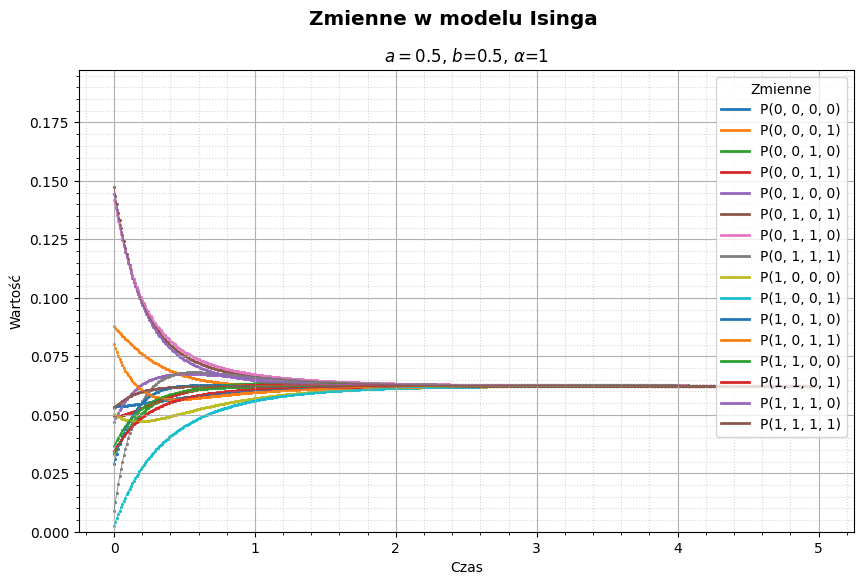

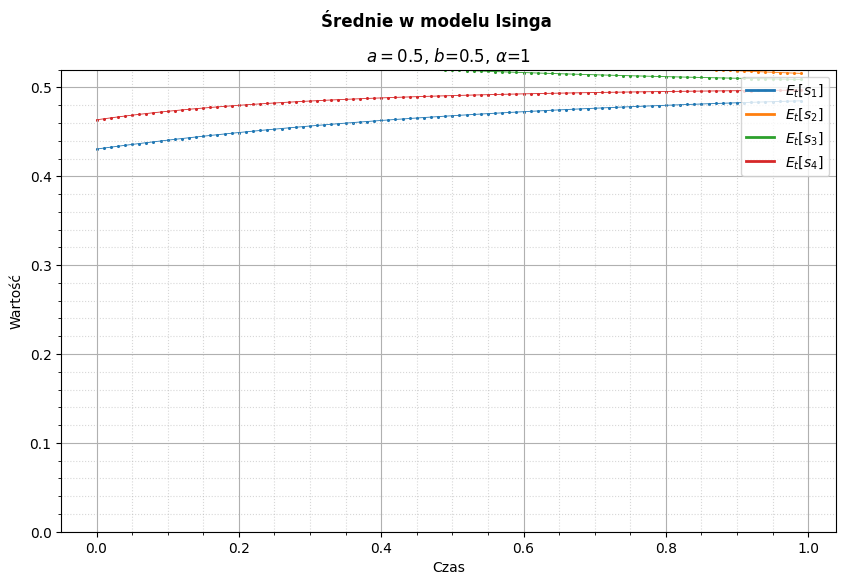

In [40]:
 # rozpoczynamy analizę
PSB = PSB_project()

# definiujemy warunki początkowe i przekazujemy je do modelu
t0 = 0
x0 = np.random.rand(16)
x0 = x0/np.sum(x0)

PSB.set_iconds(t0, x0)

# definiujemy hiperparametry i przekazujemy je do modelu
a, b, alpha = 0.5, 0.5, 1
PSB.set_params(a, b, alpha)

# generujemy macierz układu równań
PSB.generate_A()

# rozwiązujemy układ metodą Rungego-Kutty rzędu 4
t, x = PSB.Runge_Kutta()

# rysujemy wykresy
fig_var = PSB.plot_variables(t, x, horizon = 5)
fig_exp = PSB.plot_expectations(t, x, horizon = 1)

Analizy komparatywne - badamy wpływ hiperparametrów:

In [45]:
# Uwaga: iloczyny długości elementów tych list muszą być parzyste bądź równe 3.
# W przeciwnym przypadku funkcja zwraca błąd.
# Jest to związane z wygodą wzajemnego ułożenia "axes" na "figure" w Matplotlib.
As = [1., 2.] # [0.25, 0.5, 1., 1.5, 2., 2.5]
Bs = [1., 2.] # [1.]
Alphas = [0.1, 0.5, 1., 2.]

Wszystko ok!


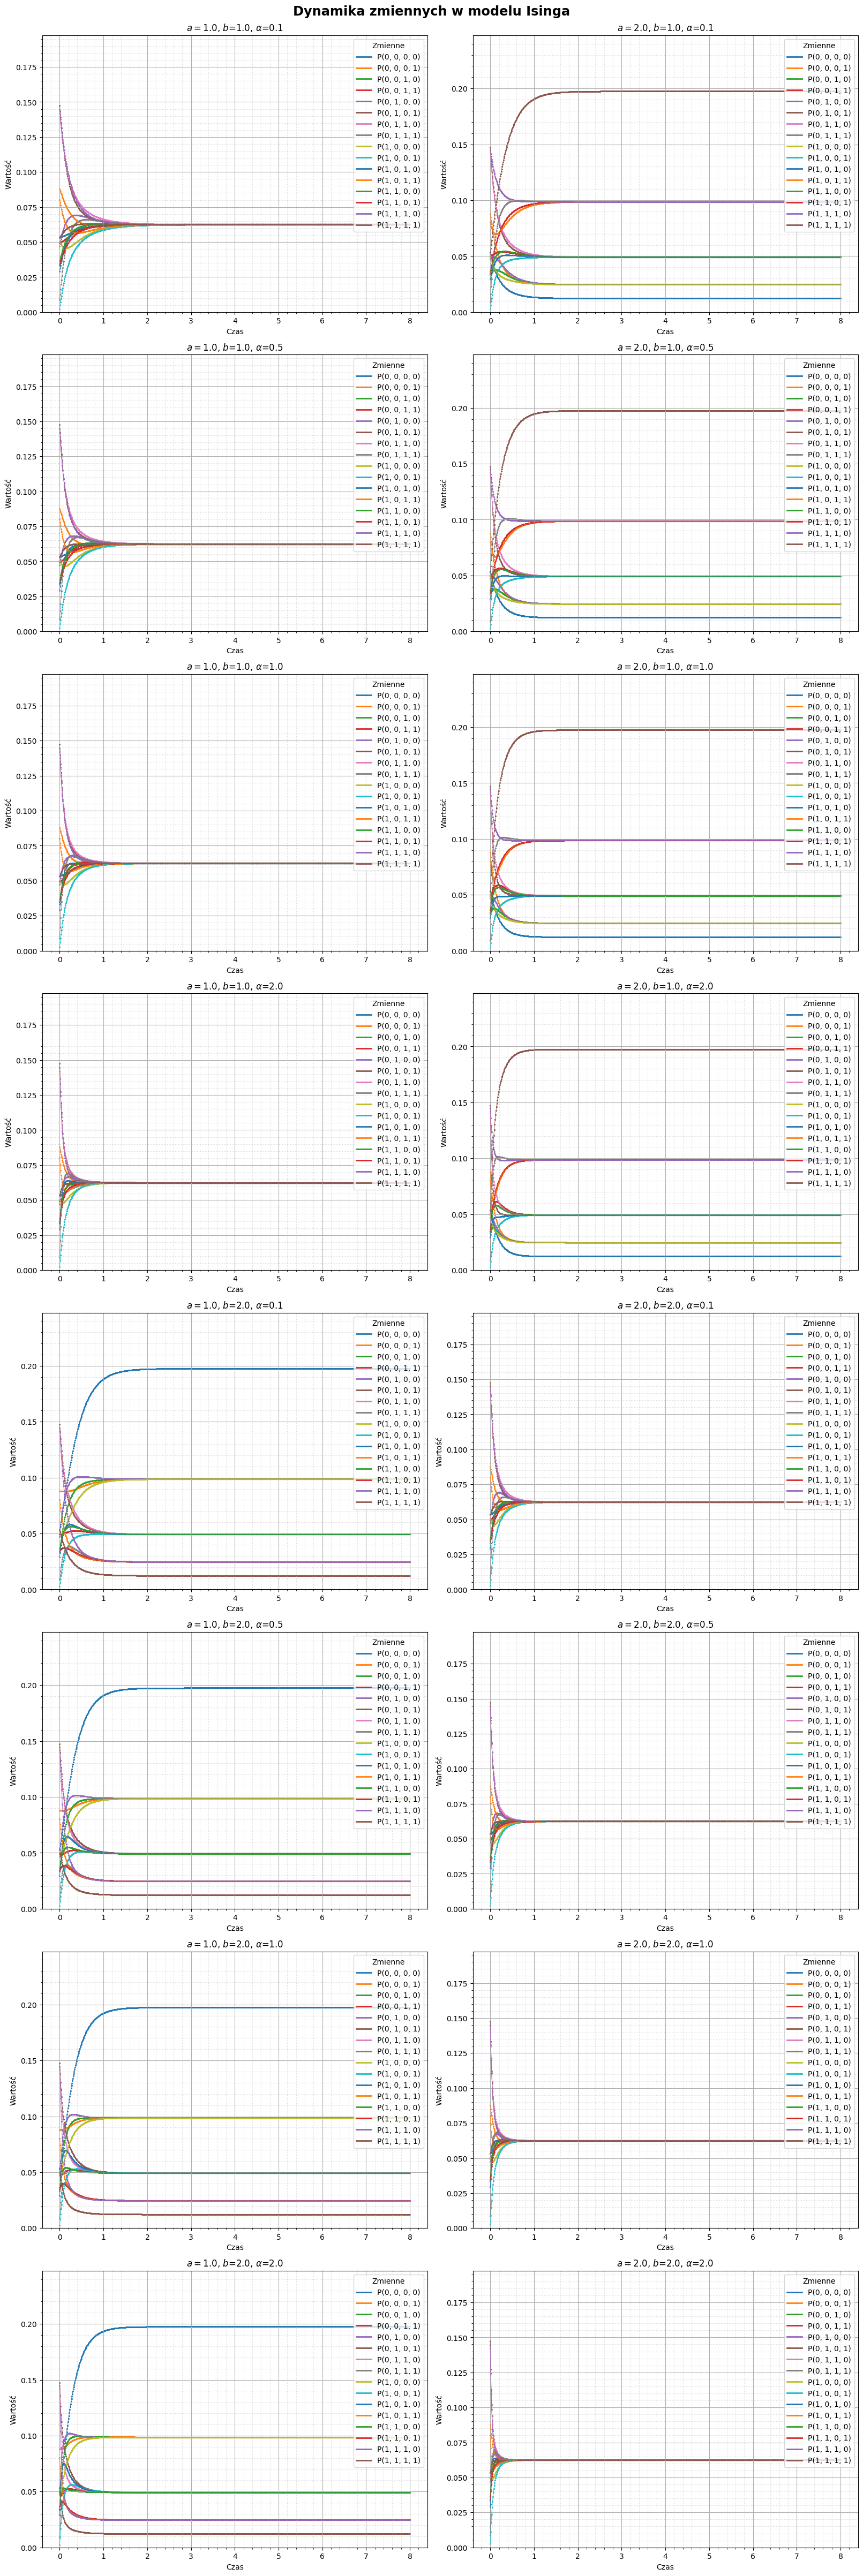

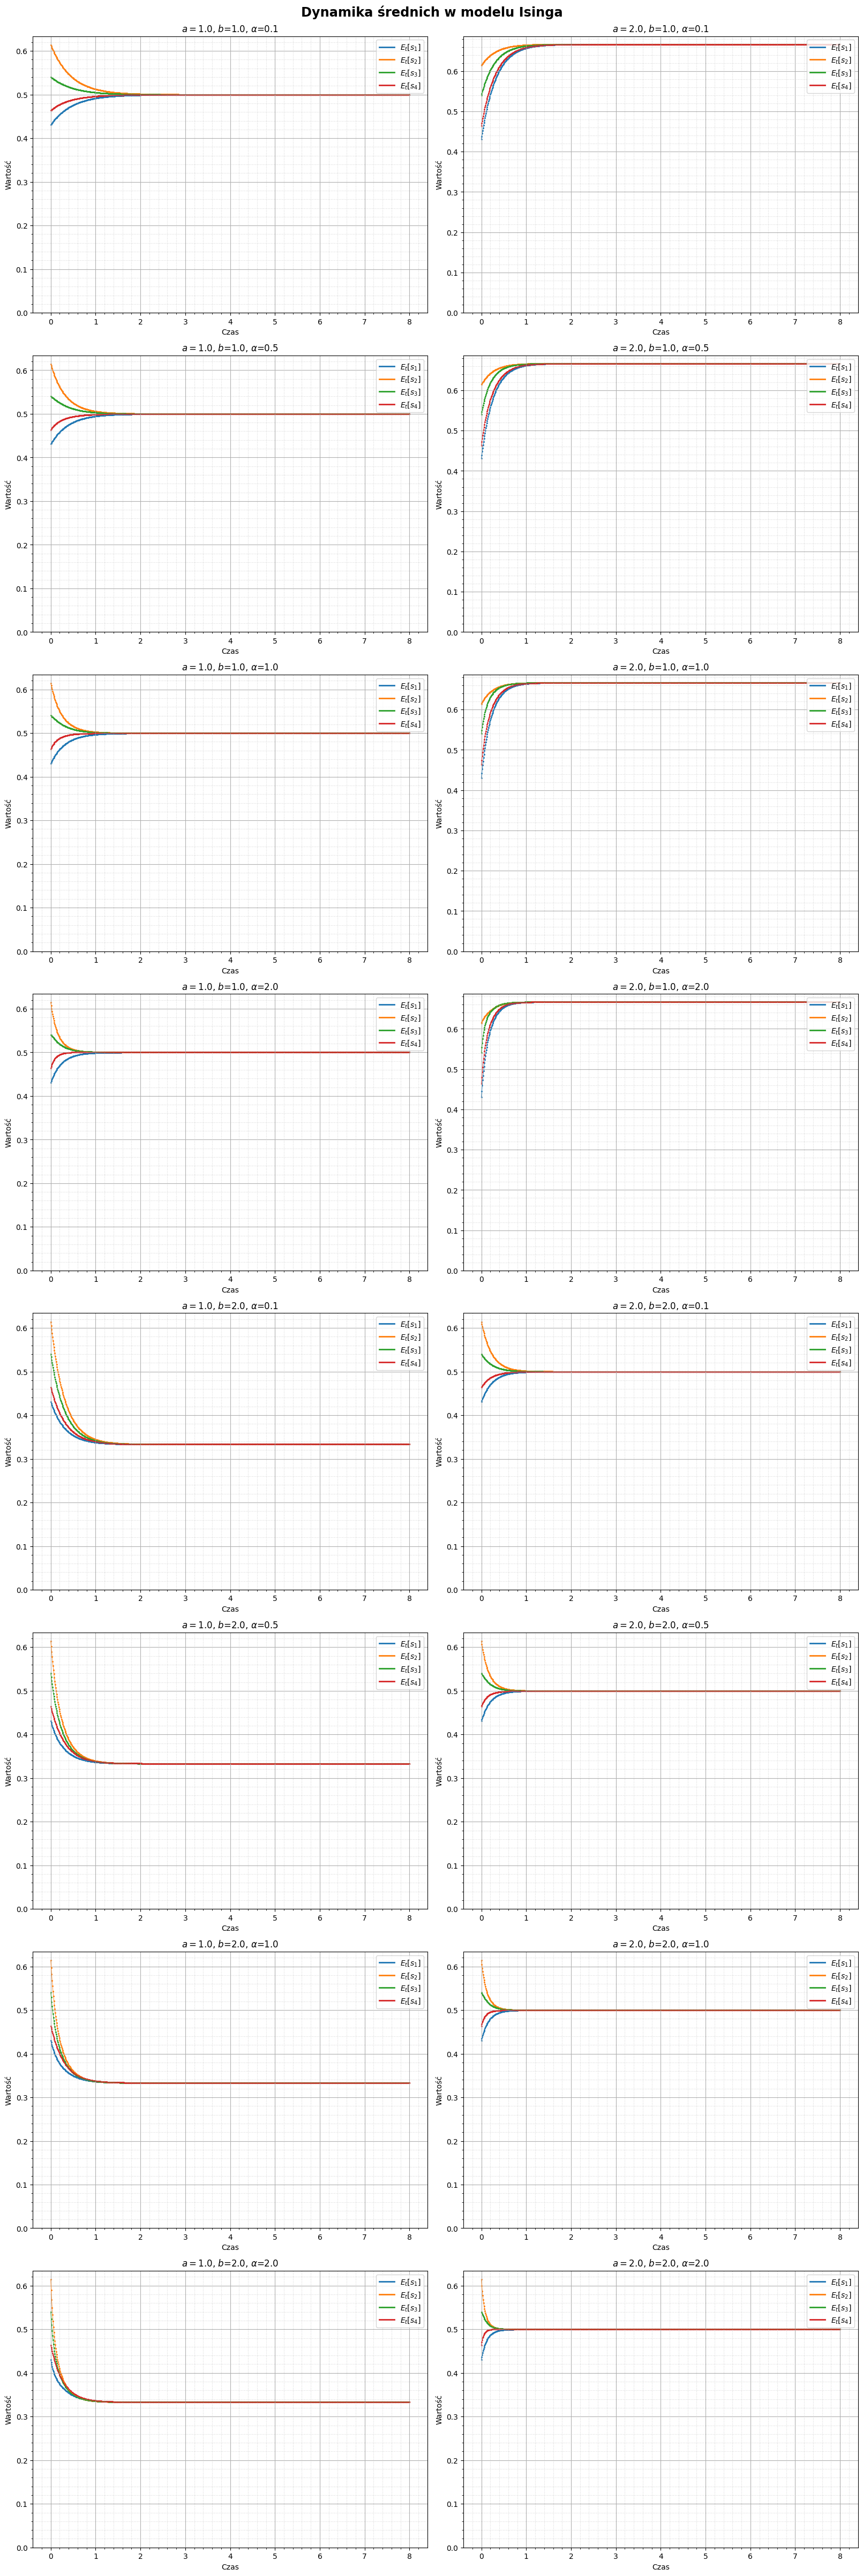

In [46]:
PSB.comparative_plot_variables(As, Bs, Alphas, horizon = 8., save = True)
PSB.comparative_plot_expectations(As, Bs, Alphas, horizon = 8., save = True)
print("Wszystko ok!")

# Część 3.

Do zrobienia pozostaje cała część interpretacyjna. W szczególności:

1. Należy się zastanowić, w jaki dokładnie sposób poruszanie hiperparametrami wpływa na model.
2. Należy dobrze zrozumieć "wypłaszczenia" na wykresach. Intuicja jest taka, że są to jakieś stany stacjonarne. Warto jednak zauważyć, że dla $a=b$ wypłaszczają się już wykresy zmiennych. Dla $a\neq b$ wypłaszczają się dopiero wykresy średnich.
3. Należy dobrze zrozumieć, jak w tym modelu interpretowane są średnie $E_t[s_i]$ dla $i=1, 2, 3, 4$.

Należy odpowiedzieć na powyższe pytania i następnie napisać solidny raport w LaTeXu, zawierający wyczerpujące odpowiedzi na te pytania.

Ponadto:
1. Można spróbować zaproponować inną regułę wpisywania elementów macierzy $A$. W poleceniu była dość uboga reguła:
$$w_i(s_i | \bar s_i; \vec s_i) = w(s_i | \bar s_i)\cdot[1 + \alpha(s_{i-1} + s_{i+1})]$$
gdzie $w(1 | 0) = a, w(0 | 1) = b$.

2. Można również spróbować uogólnić zadanie na więcej niż $N=4$ wpływające na siebie obiekty. Idealnie byłoby, żeby liczba obiektów $N$ była podawana do modelu jako parametr!